In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns



In [2]:
df = pd.read_csv("/Users/Max/OneDrive/Documenten/Python/Python leerclub/datasets_2756_4568_pokemon.csv")


In [96]:
def filter_columns(dataf):
    keep_columns = ['pokedex_number',
                   'name',
                   'attack',
                   'weight_kg',
                   'generation',
                    'type1',
                   'abilities'
                   ]
    return dataf[keep_columns]

#def filter_rows(dataf):
    #return (dataf[lambda d: d['generation']==1]
           #)

def change_dtypes(dataf):
    dataf.change_type()
    return dataf

def preprocess_columns(dataf):
    #dataf['abilities'].string.split[',']
    return dataf

In [98]:
clean_df = (df
            .pipe(filter_columns)
            .pipe(change_dtypes)
            .pipe(preprocess_columns)
           )
clean_df     

,pokedex_number,name,attack,weight_kg,generation,type1,abilities
0,1,Bulbasaur,49,6.9,1,grass,"['Overgrow', 'Chlorophyll']"
1,2,Ivysaur,62,13.0,1,grass,"['Overgrow', 'Chlorophyll']"
2,3,Venusaur,100,100.0,1,grass,"['Overgrow', 'Chlorophyll']"
3,4,Charmander,52,8.5,1,fire,"['Blaze', 'Solar Power']"
4,5,Charmeleon,64,19.0,1,fire,"['Blaze', 'Solar Power']"
...,...,...,...,...,...,...,...
796,797,Celesteela,101,999.9,7,steel,['Beast Boost']
797,798,Kartana,181,0.1,7,grass,['Beast Boost']
798,799,Guzzlord,101,888.0,7,dark,['Beast Boost']
799,800,Necrozma,107,230.0,7,psychic,['Prism Armor']


# Q1 What is the relation between weight and attack?

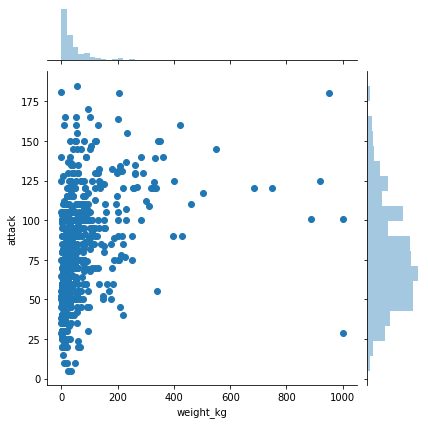

In [99]:
sns.jointplot(data=clean_df,x='weight_kg',y='attack')

In [100]:
corr_weight_attack = clean_df[['weight_kg','attack']].dropna().corr()
corr_weight_attack

,weight_kg,attack
weight_kg,1.000000,0.382183
attack,0.382183,1.000000


# Q2 : Which type is the strongest overall? Which is the weakest?

In [103]:
def agg_type_strength(dataf):
    agg_dataf = (dataf
                 .groupby('type1')
                 .agg(n=('type1','count'),
                      mean_strength=('attack', np.mean)
                      )
                 .sort_values('mean_strength',ascending=True)
                 .reset_index()
                )
    return agg_dataf

type_strength_df = clean_df.pipe(agg_type_strength)
type_strength_df

,type1,n,mean_strength
0,fairy,18,62.111111
1,psychic,53,65.566038
2,flying,3,66.666667
3,bug,72,70.125000
4,electric,39,70.820513
5,poison,32,72.656250
6,ghost,27,72.740741
7,ice,23,73.304348
8,water,114,73.307018
9,grass,78,73.769231


TypeError: 'str' object is not callable

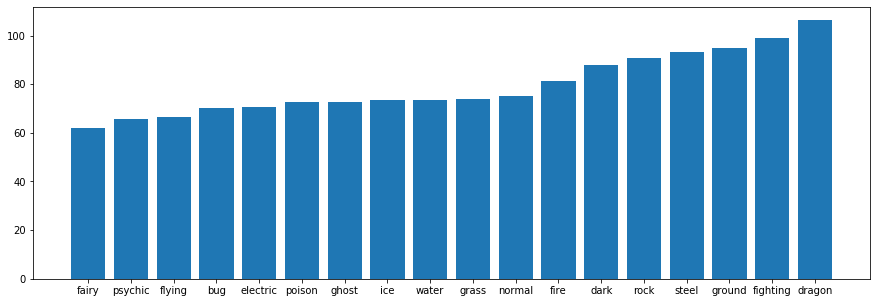

In [111]:
fig = plt.figure(figsize=(15,5))

plt.bar(data=type_strength_df,x='type1',height='mean_strength',width=0.8)
plt.xlabel('Type')
plt.show()
